# Showing WordClouds by Album
Lets look at the wordclouds for every album! 

In [1]:
import pandas as pd
import string
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline

Load the lyrics of all english language songs from a studio album. Also crteate a 'metadata' string - basiclly a string representation of json or dict that we will use later to identify each song as it is transformed into a spaCy doc.

In [7]:
lyrics = pd.read_csv("data/SFALyrics_p.csv", dtype=str)
lyrics['lyrics'] = lyrics['lyrics'].replace('\n',' ', regex=True)
lyrics['lyrics'] = lyrics['lyrics'].str.lower()
lyrics['metadata'] = '{"title": "' + lyrics['title'] + '" ,"album":"' + lyrics['album'] + '"}'

lyrics.head()

,Unnamed: 0,lyrics,title,album,metadata
0,0,i had a soul transplant operation coz my bypa...,God! How me magic,Fuzzy Logic,"{""title"": ""God! How me magic"" ,""album"":""Fuzzy ..."
1,1,"[bunf:] hamster, turnin' round in your wheel ...",Fuzzy Birds,Fuzzy Logic,"{""title"": ""Fuzzy Birds"" ,""album"":""Fuzzy Logic""}"
2,2,"first time, i did it for the hell of it stuck...",Something 4 the weekend,Fuzzy Logic,"{""title"": ""Something 4 the weekend"" ,""album"":""..."
3,3,locked in a sorry dream you know we're drowni...,Frisbee,Fuzzy Logic,"{""title"": ""Frisbee"" ,""album"":""Fuzzy Logic""}"
4,4,i was lost lost on the bypass road could be ...,Hometown Unicorm,Fuzzy Logic,"{""title"": ""Hometown Unicorm"" ,""album"":""Fuzzy L..."


## WordCloud based off all lyrics

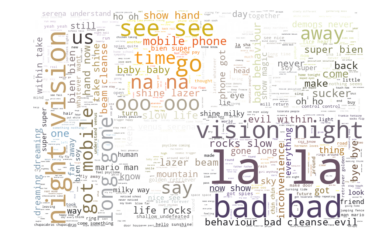

In [8]:
text = lyrics['lyrics'].str.cat(sep=' ')

mask = np.array(Image.open("images/fuzzy-logic-sfa.jpg"))

wordcloud_usa = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)

plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("images/lyrics.png", format="png", bbox_inches="tight")

plt.show()

## Generate a word cloud for each album

In [9]:
cover = {
    'Fuzzy Logic' : 'FuzzyLogic.jpg',
    'Radiator' : 'Radiator.jpg',
    'Guerilla': 'Guerrilla.jpg',
    'Rings around the World' : 'RATW.png',
    'Phantom Power' : 'PhantomPower.jpg',
    'Love Kraft' : 'Lovekraft.jpg',
    'Hey! Venus': 'HeyVenus.jpg',
    'Dark Days/Light Years' : 'DarkDaysLightYears.jpg'
    }

cover['Fuzzy Logic']

'FuzzyLogic.jpg'

KEY: Dark Days/Light Years


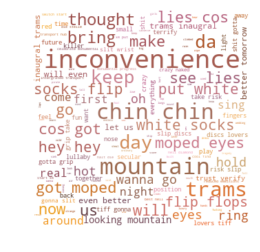

KEY: Fuzzy Logic


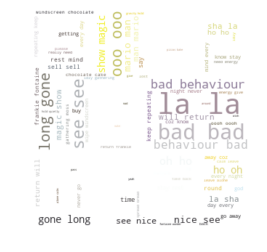

KEY: Guerilla


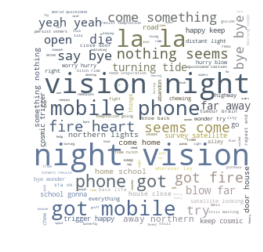

KEY: Hey! Venus


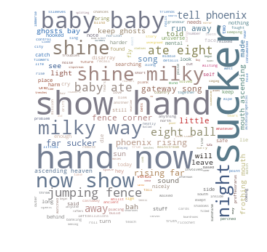

KEY: Love Kraft


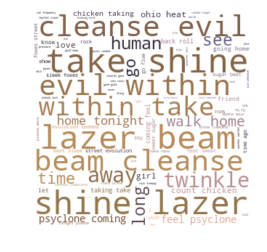

KEY: Phantom Power


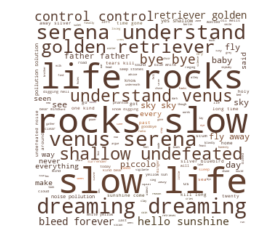

KEY: Radiator


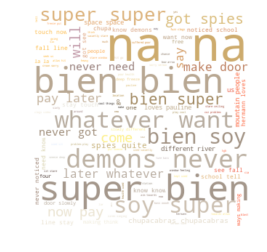

KEY: Rings around the World


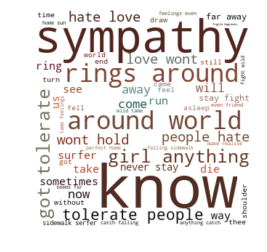

In [11]:
# split the 

albums2 = lyrics.groupby('album')
#for key, item in albums2:
    #print(albums2.get_group(key),  "\n\n")

for key, album in albums2:
    print("KEY:" , key)
    text = album.lyrics.str.cat()
    mask = np.array(Image.open("images/" + cover[key]))
    wordcloud_usa = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)
    # create coloring from image
    image_colors = ImageColorGenerator(mask)

    plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.savefig("images/album_wc/" + cover[key] + ".png", format="png", bbox_inches="tight")
    plt.show()
    